# Wand Binds to ImageMagick

[Wand](https://docs.wand-py.org/) is a `ctypes`-based [📖 [docs](https://docs.python.org/3/library/ctypes.html#module-ctypes)] simple [ImageMagick](http://www.imagemagick.org/) binding for Python.

## Drawing Composites

It may seem counterintuitive to “draw” composite images when one associates _drawing_ with vector-based graphics. Wand interfaces with ImageMagick to [draw composites](https://docs.wand-py.org/en/0.6.3/guide/draw.html?highlight=composite_operators#composite) from bitmaps using one of several `COMPOSITE_OPERATORS` [📖 [docs](https://docs.wand-py.org/en/0.6.3/wand/image.html#wand.image.COMPOSITE_OPERATORS)].

We will show this by:

1. Saving a photo of a kitten to disk.
2. Drawing the text _hello kitty_ in a new image and saving to disk.
3. Composite clones of the two images with a selected composite operator and saving to disk.

## #1

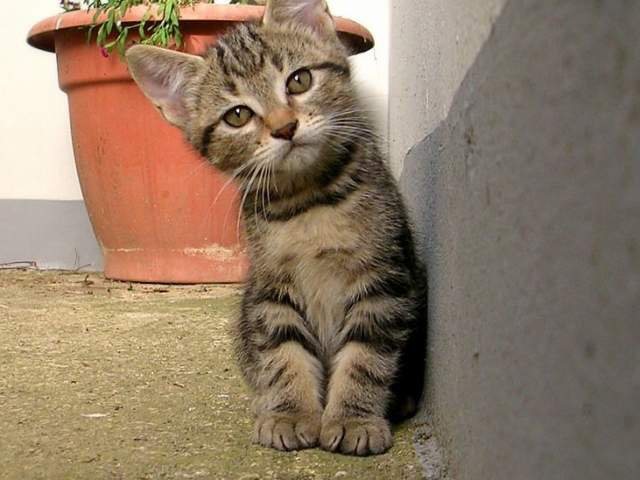

In [1]:
from IPython import display
from urllib import request
from wand.image import Image

w, h = 640, 480
output_filename = f'./images/wand_03_kitten_{w}x{h}.png'

response = request.urlopen(f'https://placekitten.com/{w}/{h}')

try:
    with Image(blob=response.read()) as img:
        img.save(filename=output_filename)
finally:
    response.close()

display.Image(filename=output_filename)

## #2

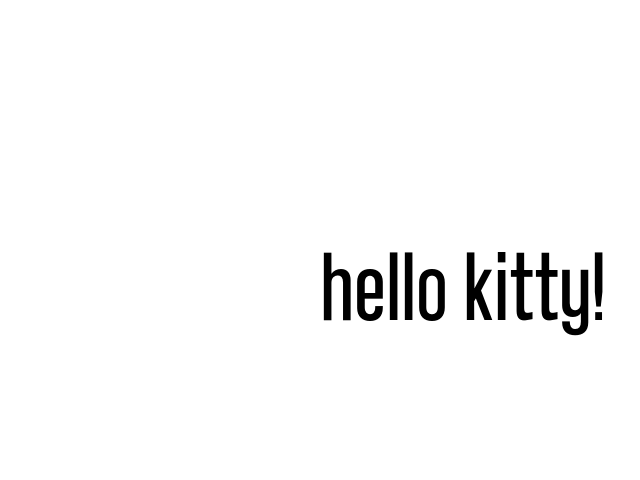

In [2]:
from wand.color import Color
from wand.drawing import Drawing

def generate_text_layer(color_code, output_filename):
    x, y = int(w/2), int((h/3)*2)

    with Drawing() as draw:

        with Color(color_code) as text_color:
            draw.fill_color = text_color
            draw.font = './open-type-fonts/landasans-font/LandasansMedium-ALJ6m.otf'
            draw.font_size = 96
            draw.text(x, y, 'hello kitty!')

            with Color('transparent') as background_color:
                with Image(width=w, height=h, background=background_color) as img:
                    draw(img)
                    img.save(filename=output_filename)

color_code = '#000'
output_filename = f'./images/wand_03_text_black_{w}x{h}.png'
generate_text_layer(color_code, output_filename)

display.Image(filename=output_filename)

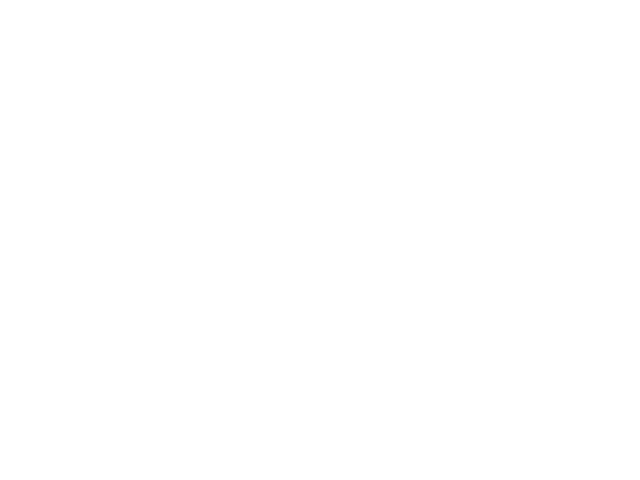

In [3]:
color_code = '#fff'
output_filename = f'./images/wand_03_text_white_{w}x{h}.png'
generate_text_layer(color_code, output_filename)

display.Image(filename=output_filename)

## #3

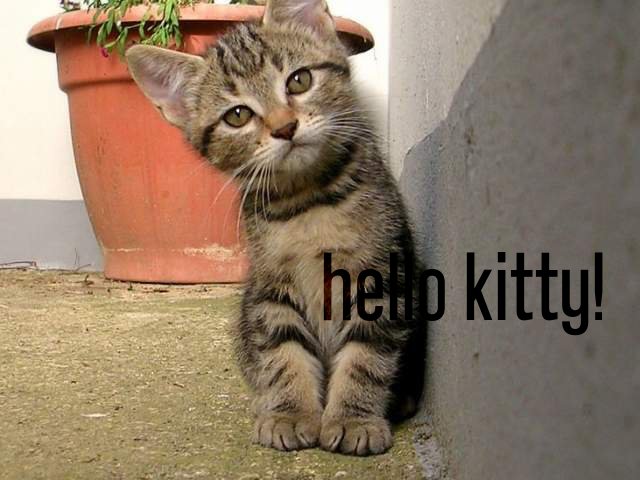

In [4]:
from wand.image import COMPOSITE_OPERATORS

def generate_composite(text_image_name, composite_operator, output_filename):
    with Image(filename='./images/wand_03_kitten_640x480.png') as kitten_image:
        with Image(filename=text_image_name) as text_image:
            with kitten_image.clone() as layer_00:
                with text_image.clone() as layer_01:
                    with Drawing() as draw:
                        draw.composite(
                            operator=composite_operator,
                            left=0,
                            top=0,
                            width=w,
                            height=h,
                            image=layer_01
                        )

                        draw(layer_00)
                        layer_00.save(filename=output_filename)

composite_operator = 'overlay'
output_filename = f'./images/wand_03_composite_{composite_operator}_{w}x{h}.png'
text_image_name = './images/wand_03_text_black_640x480.png'

generate_composite(text_image_name, composite_operator, output_filename)

display.Image(filename=output_filename)

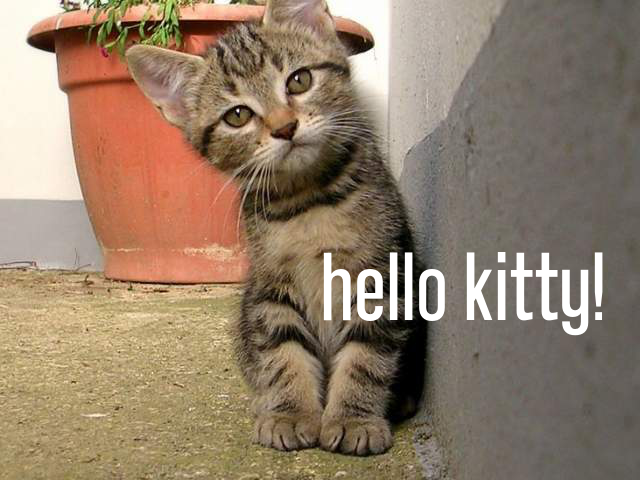

In [5]:
composite_operator = 'screen'
output_filename = f'./images/wand_03_composite_{composite_operator}_{w}x{h}.png'
text_image_name = './images/wand_03_text_white_640x480.png'

generate_composite(text_image_name, composite_operator, output_filename)

display.Image(filename=output_filename)

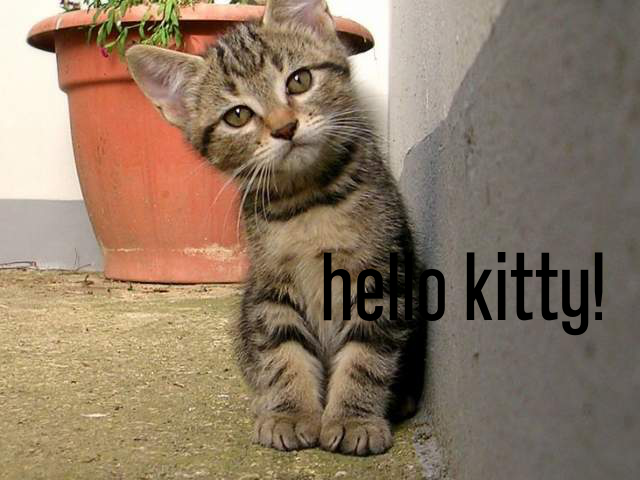

In [6]:
composite_operator = 'over'
output_filename = f'./images/wand_03_composite_{composite_operator}_{w}x{h}.png'
text_image_name = './images/wand_03_text_black_640x480.png'

generate_composite(text_image_name, composite_operator, output_filename)

display.Image(filename=output_filename)

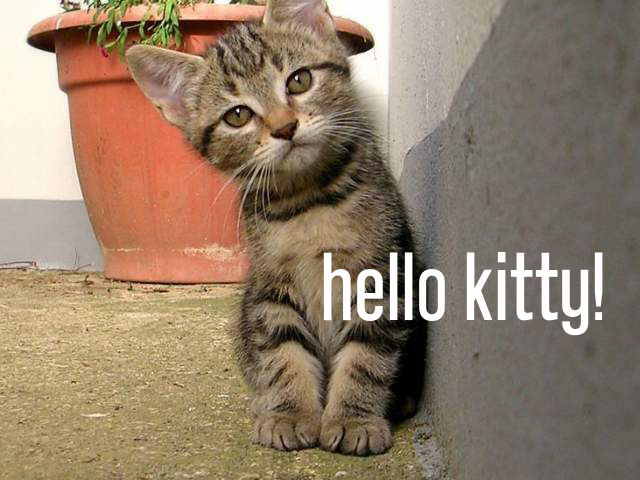

In [7]:
composite_operator = 'difference'
output_filename = f'./images/wand_03_composite_{composite_operator}_{w}x{h}.png'
text_image_name = './images/wand_03_text_black_640x480.png'

generate_composite(text_image_name, composite_operator, output_filename)

display.Image(filename=output_filename)